In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
sns.set()

-68.8182815653867 76.07897893967947


<AxesSubplot:>

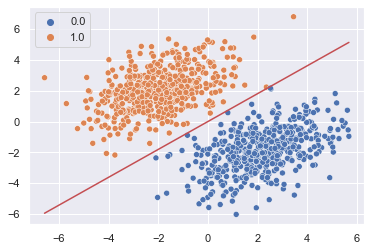

In [36]:
np.random.seed(42)

N1, N2 = 500, 500
alpha = 2.0
covariance = [[2, 1], [1, 2]]
A = np.linalg.cholesky(covariance)
X1 = np.random.randn(2, N1)
X2 = np.random.randn(2, N2)
X1 = (A @ X1).T + np.array([-alpha, alpha])
X2 = (A @ X2).T + np.array([alpha, -alpha])
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((np.ones(N1), np.zeros(N2)))
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]
X = X
y = y

model = LogisticRegression(penalty='none', tol=1e-4, fit_intercept=False)
model.fit(X, y)
theta1, theta2 = model.coef_[0]
print(theta1, theta2)

bound_x = np.linspace(min(X[:, 0]), max(X[:, 0]))
bound_y = -theta1 / theta2 * bound_x

plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.lineplot(x=bound_x, y=bound_y, color='r')
# plt.savefig('figures/lr_data_alpha20.jpg')

## Extended Kalman Filter for Online Parameter Estimation ##

In [37]:
s_n1_n1 = np.array([[1], [-1]])
P_n1_n1 = 10 * np.eye(2)
Q = 0.0001 * np.eye(2)
R = 0.001
Imatrix = np.eye(2)

s_history = np.zeros((len(X) + 1, 2))
s_history[0] = s_n1_n1.flatten()
for i, (xi, yi) in enumerate(zip(X, y)):
    xi = xi.reshape((-1, 1))
    # prediction
    s_n_n1 = s_n1_n1
    P_n_n1 = P_n1_n1 + Q

    # correction
    innov = yi - 1 / (1 + np.exp(-s_n_n1.T @ xi)[0])
    # using first-order derivative to approximate non-linear function
    H = xi.T * np.exp(-s_n_n1.T @ xi)[0] / (1 + np.exp(-s_n_n1.T @ xi)[0])**2
    k = (P_n_n1 @ H.T) / (H @ P_n_n1 @ H.T + R)  # (2, 1)
    s_n1_n1 = s_n_n1 + k * innov
    P_n1_n1 = (Imatrix - k @ H) @ P_n_n1

    s_history[i + 1] = s_n1_n1.flatten()

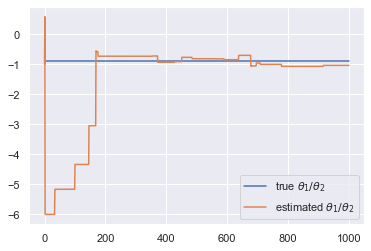

In [38]:
plt.figure()
sns.lineplot(x=range(len(s_history)), y=theta1 / theta2, label=r'true $\theta_1/\theta_2$')
sns.lineplot(x=range(len(s_history)), y=s_history[:, 0] / s_history[:, 1], label=r'estimated $\theta_1/\theta_2$')
plt.savefig('figures/lr_ekf_alpha20.jpg')